<h1>Realspace hopping from $H(\mathbf{k})$</h1>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import lattice2D
#import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from IPython.display import display, Math

mpl.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': 'cmr10',
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    'axes.unicode_minus': True,
    'axes.labelsize' : 21,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.top': 'on',
    'xtick.major.bottom': 'on',
    'ytick.major.left': 'on',
    'ytick.major.right': 'on',
    'xtick.top': True,
    'ytick.right': True })

<h2>Functions</h2>

In [2]:
def k2r(gk):#, latt, nOrb):
    gr = np.zeros((LQ, nOrb, nOrb), dtype=complex)
    for nk in range(LQ):
        for no1 in range(nOrb):
            for no in range(nOrb):
                for nr in range(LQ):
                    gr[nr,no,no1] += np.exp(1j*np.dot(xy[nr],kxy[nk])) * gk[nk,no,no1]
    return gr/LQ

def dim(a):
    if not type(a) == list:
        return []
    return [len(a)] + dim(a[0])

def plotRealspaceMatrix(gr, threshold=1E-10, scale=None):
    ij = np.empty((0,2), dtype=int)
    for i in range(nOrb):
        for j in range(i,nOrb):
            re = np.max(np.abs(np.real(gr[:,i,j])))
            im = np.max(np.abs(np.imag(gr[:,i,j])))
            if re > threshold or im > threshold:
                ij = np.vstack(( ij, np.array([i,j]) ))

    if scale == None:
        scale = max(np.max(np.abs(np.real(gr))),np.max(np.abs(np.imag(gr))))
                
    fig, ax = plt.subplots(ncols=2, nrows=len(ij), figsize=(14,5*len(ij)), squeeze=False)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for k,tij in enumerate(ij):
        ax[k,0].set_title(r'${\rm Re}\, t_{%d%d}$'%(tij[0]+1,tij[1]+1), fontsize=18)
        ax[k,1].set_title(r'${\rm Im}\, t_{%d%d}$'%(tij[0]+1,tij[1]+1), fontsize=18) 
        ax[k,0].set_xlabel(r'$x$', fontsize=18)
        ax[k,1].set_xlabel(r'$x$', fontsize=18)
        ax[k,0].set_ylabel(r'$y$', fontsize=18)
        ax[k,1].set_ylabel(r'$y$', fontsize=18)
        for n in range(2):
            xticks = np.arange(0,Lx)
            yticks = np.arange(0,Ly)
        #     ticklabels = np.array([])
        #     for p in np.arange(0,L):
        #         if p%2 == 1:
        #             ticklabels = np.append(ticklabels, r'$%s$'%(str(p-Lx//2)))
        #         else:
        #             ticklabels = np.append(ticklabels, '')
            ax[k,n].set_xticks(xticks)
            ax[k,n].set_yticks(yticks)
        #     ax[k,n].set_xticklabels(ticklabels)
        #     ax[k,n].set_yticklabels(np.flip(ticklabels, axis=0))

        im = np.real(np.reshape(gr[:,tij[0],tij[1]], (Lx,Ly)))
        im = ax[k,0].imshow(im, cmap=mpl.colormaps['bwr'], vmin=-scale, vmax=scale)
        cax = make_axes_locatable(ax[k,0]).append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        im = np.imag(np.reshape(gr[:,tij[0],tij[1]], (Lx,Ly)))
        im = ax[k,1].imshow(im, cmap=mpl.colormaps['bwr'], vmin=-scale, vmax=scale)
        cax = make_axes_locatable(ax[k,1]).append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

    return ij

def plotRealspaceMatrix2(latt, gr, threshold=1E-10, scale=None):
    ij = np.empty((0,2), dtype=int)
    for i in range(nOrb):
        for j in range(i,nOrb):
            re = np.max(np.abs(np.real(gr[:,i,j])))
            im = np.max(np.abs(np.imag(gr[:,i,j])))
            if re > threshold or im > threshold:
                ij = np.vstack(( ij, np.array([i,j]) ))

    if scale == None:
        scale = max(np.max(np.abs(np.real(gr))),np.max(np.abs(np.imag(gr))))
                
    fig, ax = plt.subplots(ncols=2, nrows=len(ij), figsize=(14,5*len(ij)), squeeze=False)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for k,tij in enumerate(ij):
        ax[k,0].set_title(r'${\rm Re}\, t_{%d%d}$'%(tij[0]+1,tij[1]+1), fontsize=18)
        ax[k,1].set_title(r'${\rm Im}\, t_{%d%d}$'%(tij[0]+1,tij[1]+1), fontsize=18) 
        ax[k,0].set_xlabel(r'$x$', fontsize=18)
        ax[k,1].set_xlabel(r'$x$', fontsize=18)
        ax[k,0].set_ylabel(r'$y$', fontsize=18)
        ax[k,1].set_ylabel(r'$y$', fontsize=18)

        plotRealspaceMatrixLatt(ax[k,0], latt, gr[:,tij[0],tij[1]], func=np.real, scale=scale)
        plotRealspaceMatrixLatt(ax[k,1], latt, gr[:,tij[0],tij[1]], func=np.imag, scale=scale)

    return ij


def plotRealspaceMatrixLatt(ax, latt, gr, func=np.real, threshold=1E-10, scale=None):

    xylist = np.zeros((latt.N, len(latt.WScell), 2))
    for nr, xy in enumerate(latt.list_xy):
        xy[1] *= -1
        xylist[nr] = xy + latt.WScell/[Lx,Ly]
        
    C = func(gr)
    if scale == None: scale = max(np.amax(C), np.abs(np.amin(C)))

    patches = []
    colors = []
    ax.set_aspect(1)
    for nu, cell in enumerate(xylist):
        patches.append(Polygon(cell, closed=True, linewidth=None, fill=True))
        colors.append(C[nu])
    p = PatchCollection(patches, cmap=mpl.colormaps['bwr'], match_original=True)
    p.set_array(colors)
    p.set_clim(-scale,scale)
    ax.add_collection(p)
    cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05)
    ticks = [-scale, -scale/2, 0, scale/2, scale]
    cbar = plt.colorbar(p, cax=cax, ticks=ticks)
    cbar.set_ticklabels(['%.2f'%x for x in ticks])
    ax.set_xlim(np.amin(xylist[:,:,0]), np.amax(xylist[:,:,0]))
    ax.set_ylim(np.amin(xylist[:,:,1]), np.amax(xylist[:,:,1]))
#    ax.set_xticks((-np.pi, 0, np.pi))
#    ax.set_xticklabels((r'$-\pi$', 0, r'$\pi$'))
#    ax.set_ylim(-np.pi*1.05, np.pi*1.05)
#    ax.set_yticks((-np.pi, 0, np.pi))
#    ax.set_yticklabels((r'$-\pi$', 0, r'$\pi$'))
    return ax


def plotHoppingMatrix(ij):
    strng = r'$H = \left(\begin{matrix}'
    for no2 in range(nOrb):
        for no1 in range(nOrb):
            if (len(ij[np.isin( ij[:,1], no2) & np.isin( ij[:,0], no1)]) > 0) or (len(ij[np.isin( ij[:,1], no1) & np.isin( ij[:,0], no2)]) > 0):
                if no1 > no2:
                    strng += 't_{%d%d}'%(no2+1, no1+1)
                else:
                    strng += 't_{%d%d}^*'%(no1+1, no2+1)
            else:
                strng += '0'
            if no1 != nOrb-1:
                strng += ' & '
            else:
                strng += ' \\\\'
    strng += r'\end{matrix}\right)$'
    display(Math(strng))


<h2>Lattice</h2>

In [ ]:
Lx, Ly = 32,32

a1, a2 = np.array([ 1, 0]), np.array([ 0, 1])
#a1, a2 = np.array([ np.sqrt(3.0), 0]), np.array([ np.sqrt(3.0)/2, 3/2])
b1, b2 = np.transpose(2*np.pi*np.linalg.inv(np.stack((a1, a2), axis=0)))
simTorus = np.array([[Lx, 0], [0, Ly]])
latt = lattice2D.create(a1, a2, simTorus, a=1.0)
xy, kxy, LQ = latt.list_xy, latt.klist_xy, latt.N
print(latt.N)

289


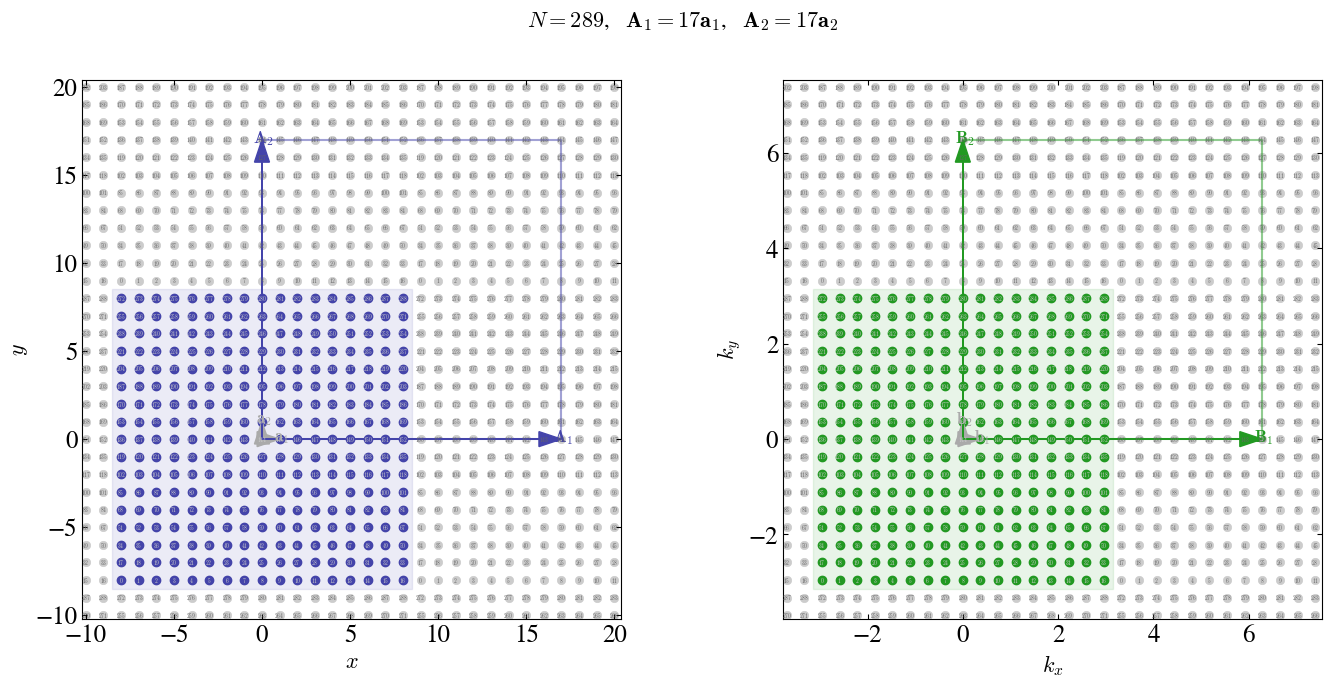

In [19]:
latt.plot('latt.pdf')

<h2>Hamiltonian</h2>

In [30]:
sigma = np.zeros((4,2,2), dtype=complex)
sigma[0] = np.array([[1, 0], [0, 1]])
sigma[1] = np.array([[0, 1], [1, 0]])
sigma[2] = np.array([[0, 1j], [-1j, 0]])
sigma[3] = np.array([[1, 0], [0, -1]])
def Gamma(A,B): return np.outer(A,B)

def H_SLAC(k):
    shift = [np.pi,np.pi]
    #shift = [0,0]
    return (k[0]+shift[0]) * sigma[1] + (k[1]+shift[1]) * sigma[2] + m * sigma[3]

def H_QBT(k):
    return (1/np.pi**2) * (k[0] * sigma[1] + k[1] * sigma[2])**2

def H_hc(k):
    return np.array([
        [  m, 1.0 + np.exp( 1j*np.dot(k,a1-a2)) + np.exp( 1j*np.dot(k,-a2))],
        [ 1.0 + np.exp(-1j*np.dot(k,a1-a2)) + np.exp(-1j*np.dot(k,-a2)), -m]])

def H_hc_patch(k):
    k = np.array(k)/3.-(b1 + 2.*b2)/3.
    return np.array([
        [  m, np.exp( 1j*np.dot(k,[0,0])) + np.exp( 1j*np.dot(k,a1-a2)) + np.exp( 1j*np.dot(k,-a2))],
        [ np.exp(-1j*np.dot(k,[0,0])) + np.exp(-1j*np.dot(k,a1-a2)) + np.exp(-1j*np.dot(k,-a2)), -m]])


<h2>Hopping elements</h2>

<IPython.core.display.Math object>

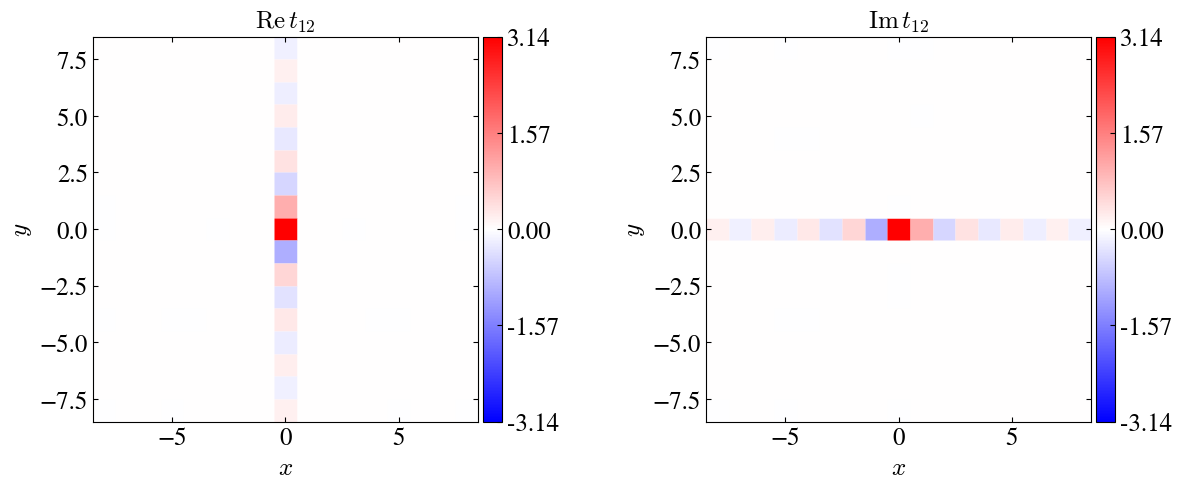

In [33]:
#H = H_QBT
H = H_SLAC
#H = H_hc_patch
a,b,c,d = 2,-1,2,0
alpha, m, lam, t, tp, t3 = 2, 0.0, 0.0, 0.0, 0.0, 0.
nOrb = H([0,0]).shape[0]
latt.nOrb = nOrb

gk = np.zeros((LQ, nOrb, nOrb), dtype=complex)
for i in range(LQ):
    gk[i] = H(kxy[i])
gr = k2r(gk)

threshold = 1E-10
ij = plotRealspaceMatrix2(latt, gr, threshold=threshold)#, scale=1.E-4)
plotHoppingMatrix(ij)

#plt.savefig('hopping.pdf')

Text(0, 0.5, '$|t(r)|$')

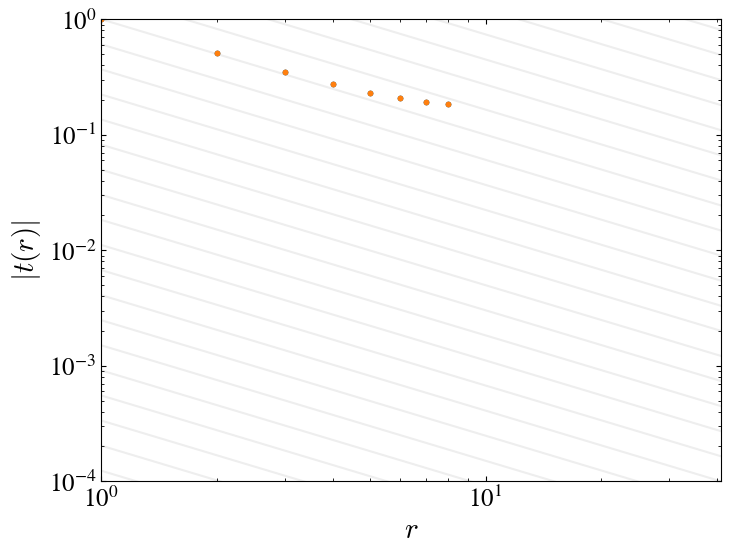

In [11]:
r = np.sqrt(np.sum(xy**2, axis=1))
val = np.abs(np.real(gr[:,0,1]))

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(r, val, '.')
x = np.linspace(1E-3,100,10000)
ax.plot(r, val, '.')
for i in np.arange(-20,20):
    ax.plot(x, x**(-1)*np.exp(i/2), color='#eeeeee', zorder=-100)
ax.set_xlim(1,41)
ax.set_ylim(1E-4,1)
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$|t(r)|$')

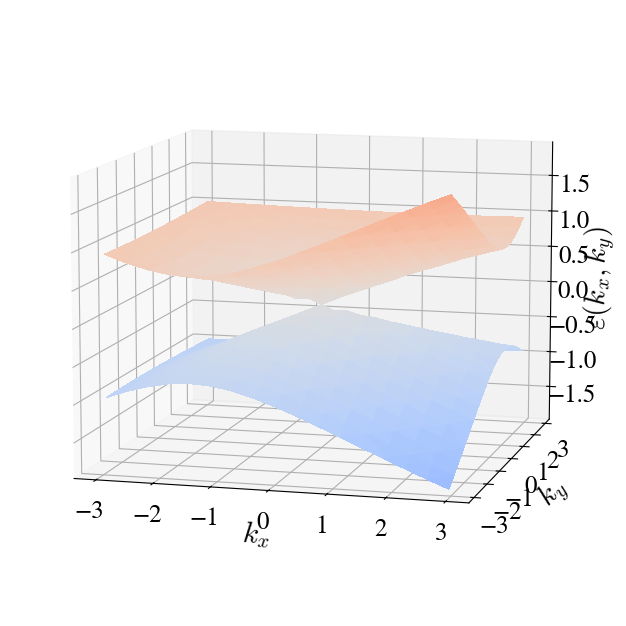

In [31]:
def ek(k,orb):
    if k.ndim == 1:
        return np.linalg.eigh(H(k))[0][orb]
    else:
        Ek = np.zeros(len(k))
        for i,ik in enumerate(k):
            Ek[i] = np.linalg.eigh(H(ik))[0][orb]
        return Ek
        
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
plt.subplots_adjust(wspace=0.3)
for i in range(nOrb):
    surf = ax1.plot_trisurf(kxy[:,0], kxy[:,1], ek(kxy,i), cmap=mpl.colormaps['coolwarm'], linewidth=0, antialiased=False, vmin=-np.sqrt(2)*np.pi, vmax=np.sqrt(2)*np.pi)
#ax1.set_xlim(-np.pi,np.pi)
#ax1.set_ylim(-np.pi,np.pi)
#ax1.set_zlim(-np.sqrt(2)*np.pi, np.sqrt(2)*np.pi)
ax1.set_xlabel(r'$k_x$')
ax1.set_ylabel(r'$k_y$')
ax1.set_zlabel(r'$\varepsilon(k_x, k_y)$')
ax1.view_init(elev=10., azim=-75)
